In [1]:
import os

In [2]:
files = ['./data/ld1/Loan_Default.csv',
 './data/ld2/Default_Fin.csv',
 './data/ld3/Loan_default.csv',
 './data/ld4/Anonymize_Loan_Default_data.csv',
 './data/ld5/train.csv']

In [3]:
import pandas as pd

data = []

for file in files:
    fr = pd.read_csv(file,encoding='utf-8')
    data.append(fr)

In [4]:
targets = ['Status','Defaulted?','Default','repay_fail','Loan Status']

In [5]:
for i in range(len(data)):
    print(f'Dataset : {i+1} {files[i]}')
    print(f'Features : {len(data[i].columns)}')
    print(f'Instances : {data[i].shape[0]}')
    print(f'Distribution :')
    print(f'class 0 : {((sum(data[i][targets[i]] == 0) / data[i].shape[0]) * 100):.2f}% class 1 : {((sum(data[i][targets[i]] == 1) / data[i].shape[0])*100):.2f}%')
    print()

Dataset : 1 ./data/ld1/Loan_Default.csv
Features : 34
Instances : 148670
Distribution :
class 0 : 75.36% class 1 : 24.64%

Dataset : 2 ./data/ld2/Default_Fin.csv
Features : 5
Instances : 10000
Distribution :
class 0 : 96.67% class 1 : 3.33%

Dataset : 3 ./data/ld3/Loan_default.csv
Features : 18
Instances : 255347
Distribution :
class 0 : 88.39% class 1 : 11.61%

Dataset : 4 ./data/ld4/Anonymize_Loan_Default_data.csv
Features : 36
Instances : 38480
Distribution :
class 0 : 84.85% class 1 : 15.15%

Dataset : 5 ./data/ld5/train.csv
Features : 35
Instances : 67463
Distribution :
class 0 : 90.75% class 1 : 9.25%



In [6]:
for i in data:
    print(i.columns)
    print()

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'

(array([112031.,  36639.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

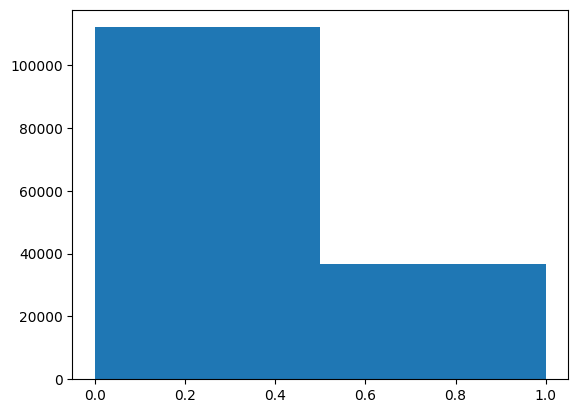

In [7]:
import matplotlib.pyplot as plt

plt.hist(data[0][targets[0]],bins=2)

(array([9667.,  333.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

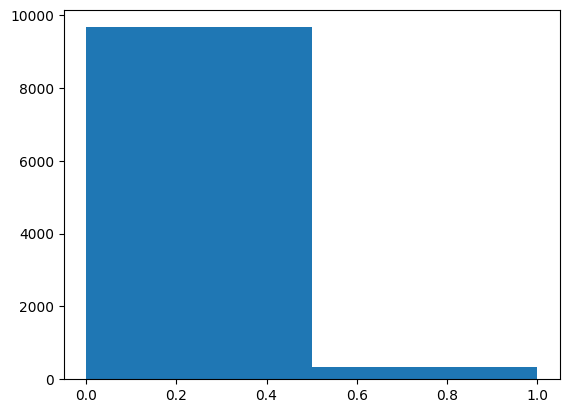

In [8]:
# print(data[1].loc['Defaulted?' == 0])
plt.hist(data[1][targets[1]],bins=2)

(array([225694.,  29653.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

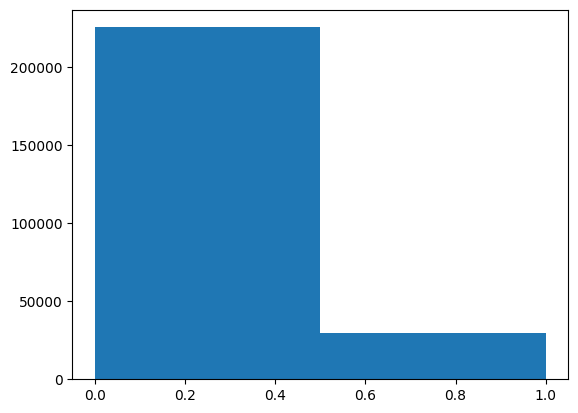

In [9]:
plt.hist(data[2][targets[2]],bins=2)

(array([32651.,  5829.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

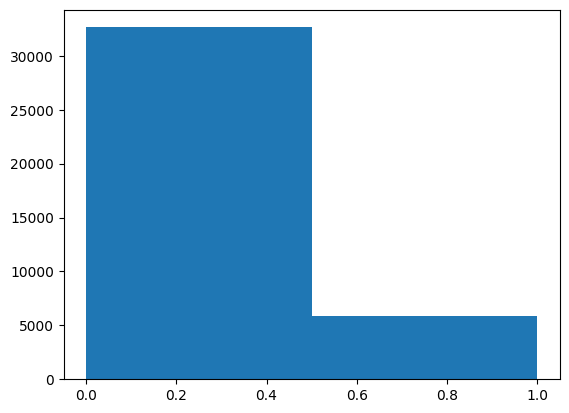

In [10]:
plt.hist(data[3][targets[3]],bins=2)

(array([61222.,  6241.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

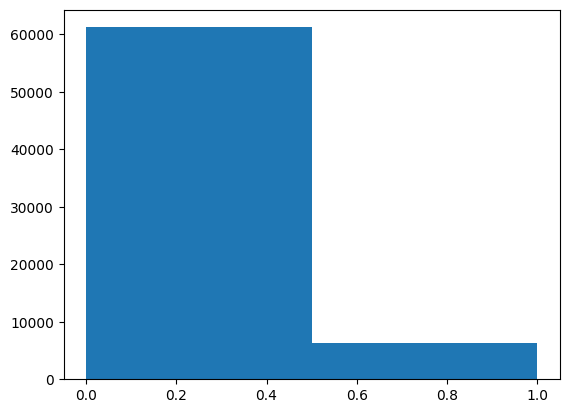

In [11]:
plt.hist(data[4][targets[4]],bins=2)

In [12]:
from sklearn.feature_selection import mutual_info_classif           # Information Gain for classification task
from sklearn.feature_selection import chi2                          # chi-square feature selection method
from sklearn.feature_selection import RFE                           # Recurssive feature elimination algorithm
from sklearn.feature_selection import SequentialFeatureSelector     # Forward feature selectioin method
from sklearn.linear_model import LassoCV , RidgeCV                  # lasso and ridge cross validation algorithms for feature selection
from sklearn.feature_selection import SelectFromModel               # to select features according to prefit LassoCV and RidgeCV

In [13]:
from sklearn.utils import resample
import numpy as np

# Load your data (replace with your data loading logic)
X = data[4].drop([targets[4]],axis=1)  # Your data features
y = data[4][targets[4]]  # Your data target variable

# Identify the minority class label
unique, counts = np.unique(y, return_counts=True)
minority_class = unique[np.argmin(counts)]

# Get the data belonging to the minority class
minority_X = X[y == minority_class]
minority_y = y[y == minority_class]

# Get the majority class data (optional, for combining later)
majority_X = X[y != minority_class]
majority_y = y[y != minority_class]

# Upsample the minority class to match the size of the majority class
n_samples = len(majority_X)  # Number of samples in the majority class
upsampled_minority = resample(minority_X, replace=True, n_samples=n_samples, random_state=42)
upsampled_minority_y = np.full(len(upsampled_minority), minority_class)  # Assign class labels

# Combine the upsampled data with the majority class (optional)
X_combined = np.concatenate((upsampled_minority, majority_X))
y_combined = np.concatenate((upsampled_minority_y, majority_y))


(array([61222., 61222.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

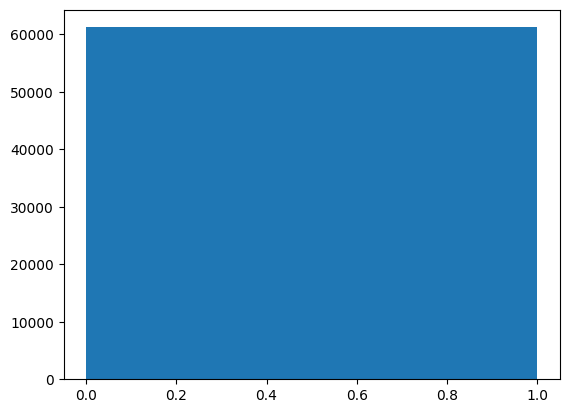

In [17]:
plt.hist(y_combined,bins=2)